In [425]:
from nltk import sent_tokenize, word_tokenize, pos_tag, ngrams
from nltk.corpus import stopwords
import string
import pandas as pd
import re
from collections import Counter

pos_map = {
    'CC':'Misc',
    'CD':'Adjective',
    'DT':'Determiner',
    'EX':'Existential',
    'FW':'Foreign',
    'IN':'Misc',
    'JJ':'Adjective',
    'JJR':'Adjective',
    'JJS':'Adjective',
    'MD':'Verb',
    'NN':'Noun',
    'NNS':'Noun',
    'NNP':'Noun',
    'NNPS':'Noun',
    'PDT':'Determiner',
    'POS':'Misc',
    'PRP':'Pronoun',
    'PRP$':'Pronoun',
    'RB':'Adverb',
    'RBR':'Adverb',
    'RBS':'Adverb',
    'RP':'Adverb',
    'SYM':'Misc',
    'TO':'Misc',
    'UH':'Misc',
    'VB':'Verb',
    'VBZ':'Verb',
    'VBP':'Verb',
    'VBD':'Verb',
    'VBN':'Verb',
    'VBG':'Verb',
    'WDT':'Determiner',
    'WP':'Pronoun',
    'WP$':'Pronoun',
    'WRB':'Adverb',
    '.':'.',
    ',':'.',
    ':':'.',
    '(':'Misc',
    ')':'Misc',
    "''":'Misc',
    "``":'Misc',
    '$':'Misc',
}

def map_generic_pos(tag):
    return pos_map[tag]

def get_tokens_as_list(df, args):
    values = df[args].tolist()
    return values

def concat_vals(ser):
    vals = ser.tolist()
    return ' '.join(vals)

def is_stopword(token):
    stops = stopwords.words('english').copy()
    return token in stops

def is_punctuation(token):
    return token in string.punctuation

def is_vowel(char):
    if char in ('a','e','i','o','u','y'):
        return True
    return False

def has_alliteration(word1, word2):
    gram00 = word1[0]
    gram10 = word2[0]
    
    if gram00==gram10:
        if is_vowel(gram00):
            return True
        else:
            if len(word1) > 1 and len(word2) > 1:
                gram01 = word1[1]
                gram11 = word2[1]
                if is_vowel(gram01) and is_vowel(gram11):
                    return True
                elif gram01 == gram11:
                    return True
    return False

def is_question(tokens):
    if tokens[-1] == '?':
        return 1
    return 0
        

class Speech():
    parallel_p = re.compile('(\w+\s,\s){2,}((\w+\sand\s\w+)|(and\s\w+))')
    
    intensifiers = ['amazingly', 'astoundingly', 'dreadfully', 'colossally', 'especially', 'exceptionally',
                'excessively', 'extremely', 'extraordinarily', 'fantastically', 'frightfully', 'fully', 
                'incredibly', 'literally', 'mightily', 'moderately', 'most', 'outrageously', 
                'phenomenally', 'quite', 'radically', 'rather', 'real', 'really', 'remarkably', 'right', 
                'somewhat', 'strikingly', 'super', 'supremely', 'surpassingly', 'terribly', 
                'terrifically', 'too', 'totally', 'uncommonly', 'unusually', 'veritable', 'very']
    
    pronouns = ['ourselves', 'she', 'themselves', 'you', 'ours', 'it', 'yourself', 'yourselves', 
                'itself', 'my', 'hers', 'her', 'theirs', 'we', 'i', 'me', 'myself', 'your', 'yours', 
                'them', 'our', 'himself', 'his', 'their', 'they', 'mine', 'herself', 'us', 'its', 'he', 'him']
    
    similarity_clauses = ['in the first place', 'not only', 'as a matter of fact', 'in like manner', 'in addition',
                      'coupled with', 'in the same fashion', 'in the same way', 'first, second, third', 
                      'in the light of', 'not to mention', 'to say nothing of', 'equally important', 
                      'by the same token', 'again', 'equally', 'identically', 
                      'uniquely', 'like', 'too', 'moreover', 'as well as', 'together with', 'of course', 
                      'likewise', 'comparatively', 'correspondingly', 'similarly', 'furthermore', 'additionally']

    opposition_clauses = ['although this may be true', 'in contrast', 'different from', 'on the other hand', 
                          'on the contrary', 'at the same time', 'in spite of', 'even so', 'even though', 
                          'be that as it may', 'then again', 'above all', 'in reality', 'after all', 'but', 
                          'and still', 'unlike', 'and yet', 'while', 'albeit', 'besides', 'as much as', 
                          'even though', 'although', 'instead', 'whereas', 'despite', 'conversely', 'otherwise', 
                          'however', 'rather', 'nevertheless', 'nonetheless', 'regardless', 'notwithstanding']

    conditional_clauses = ['in the event that', 'granted that', 'as long as', 'so long as', 'for the purpose of', 
                           'with this intention', 'with this in mind', 'in the hope that', 'to the end that', 
                           'for fear that', 'in order to', 'seeing that', 'being that', 'in view of', 'unless', 
                           'when', 'whenever', 'while', 'because of', 'while', 'lest', 'in case', 
                           'provided that', 'given that', 'only if', 'even if', 'so that', 'so as to', 'owing to', 
                           'inasmuch as', 'due to']

    example_clauses = ['in other words', 'to put it differently', 'for one thing', 'as an illustration', 'in this case', 
                'for this reason', 'to put it another way', 'that is to say', 'with attention to', 'by all means', 
                'important to realize', 'another key point', 'first thing to remember', 'most compelling evidence', 
                'must be remembered', 'point often overlooked', 'to point out', 'on the positive side', 
                'on the negative side', 'with this in mind', 'notably', 'including', 'like', 'to be sure', 'namely', 
                'chiefly', 'truly', 'indeed', 'certainly', 'surely', 'markedly', 'such as', 'especially', 'explicitly', 
                'specifically', 'expressly', 'surprisingly', 'frequently', 'significantly', 'particularly', 'in fact', 
                'in general', 'in particular', 'in detail', 'for example', 'for instance', 'to demonstrate', 
                'to emphasize', 'to repeat', 'to clarify', 'to explain', 'to enumerate']

    result_clauses = ['as a result', 'under those circumstances', 'in that case', 'for this reason', 'in effect', 
                      'thus', 'because the', 'hence', 'consequently', 'therefore', 'thereupon', 
                      'forthwith', 'accordingly', 'henceforth']

    conclusion_clauses = ['as a result', 'under those circumstances', 'in that case', 'for this reason', 
                          'in effect', ', for', 'thus', 'because the', 'then', 'hence', 'consequently', 'therefore', 
                          'thereupon', 'forthwith', 'accordingly', 'henceforth']

    sequence_clauses = ['at the present time', 'from time to time', 'sooner or later', 'at the same time',
                        'up to the present time', 'to begin with', 'in due time', 'as soon as', 'as long as',
                        'in the meantime', 'in a moment', 'without delay', 'in the first place', 'all of a sudden',
                        'at this instant', 'first', 'second ', 'immediately', 'quickly', 'finally', 'after', 'later',
                        'last', 'until', 'till', 'since', 'then', 'before', 'hence', 'since', 'when', 'once', 'about',
                        'next', 'now', 'formerly', 'suddenly', 'shortly', 'henceforth', 'whenever', 'eventually',
                        'meanwhile', 'further', 'during', 'in time', 'prior to', 'forthwith', 'straightaway ',
                        'by the time', 'whenever ', 'until now', 'now that ', 'instantly', 'presently', 'occasionally']
    
    def __init__(self, low_string):
        self.string = low_string
        self.tokens = self.make_token_df()
        self.sentences = self.make_sent_df()
        self.metrics = self.make_metrics()
        
    def make_token_df(self):
        rows = []
        sent_id = 0
        for sentence in sent_tokenize(self.string):
            for word in word_tokenize(sentence):
                info = {'token':word, 'sent_id':sent_id}
                rows.append(info)
            sent_id += 1
        parsed_speech = pd.DataFrame(rows)
        parsed_speech['is_stop'] = parsed_speech.token.apply(is_stopword)
        parsed_speech['is_punct'] = parsed_speech['token'].apply(is_punctuation)
        
        pos_tags = pos_tag(parsed_speech.token.tolist())
        just_tags = [x[1] for x in pos_tags]
        parsed_speech['pos'] = pd.Series( just_tags )
        parsed_speech['generic_pos'] = parsed_speech.pos.apply(map_generic_pos)

        return parsed_speech
        
    def make_sent_df(self):
        speech_sentences = self.tokens.groupby('sent_id').apply(get_tokens_as_list, args=('token'))
        speech_tags = self.tokens.groupby('sent_id').apply(get_tokens_as_list, args=('pos'))
        speech_sentences = pd.concat([speech_sentences,speech_tags], axis=1).reset_index()
        speech_sentences.columns = ['sent_id','tokens','pos_pattern']
        speech_sentences['sentence'] = speech_sentences['tokens'].apply(' '.join)
        speech_sentences['num_tokens'] = speech_sentences['tokens'].apply(len)
        speech_sentences = pd.concat([speech_sentences, speech_sentences.sentence.apply(self.identify_clauses)], axis=1)
        speech_sentences['has_parallel'] = speech_sentences.sentence.apply(self.contains_parallel)
        speech_sentences['alliteration_count'] = speech_sentences.tokens.apply(self.count_alliteration)
        speech_sentences['intensifier_count'] = speech_sentences.tokens.apply(self.count_intensifiers)
        speech_sentences['is_question'] = speech_sentences.tokens.apply(is_question)
        pronouns = speech_sentences.apply(self.count_pronouns, axis=1)
        speech_sentences = pd.concat([speech_sentences,pronouns], axis=1)
        return speech_sentences
    
    def get_token_dist(self):
        pos_dist = self.tokens.generic_pos.value_counts()/len(self.tokens)
        for pos in set(pos_map.values()):
            pos_dist[pos] = pos_dist.get(pos, 0)
        return pos_dist
    
    def make_metrics(self):
        metric_columns = [x for x in self.sentences.columns if x not in ['sent_id', 'tokens', 'pos_pattern', 'sentence', 'num_tokens']]
        metrics = self.sentences[metric_columns].sum()/len(self.sentences)
        pos_dist = self.get_token_dist()
        metrics = metrics.append(pos_dist)
        return metrics
    
    def __contains_clause__(self, s, args):
        patterns = args
        for pattern in patterns:
            pattern = '(^%s)|(\s%s\s)' % (pattern,pattern,)
            m = re.search(pattern, s)
            if m:
                return 1
        return 0
    
    def identify_clauses(self, s):
        similarity = self.__contains_clause__(s, Speech.similarity_clauses)#contains_similarity_clause(s)
        opposition = self.__contains_clause__(s, Speech.opposition_clauses)
        conditional = self.__contains_clause__(s, Speech.conditional_clauses)
        example = self.__contains_clause__(s, Speech.example_clauses)
        result = self.__contains_clause__(s, Speech.result_clauses)
        conclusion = self.__contains_clause__(s, Speech.conclusion_clauses)
        sequence = self.__contains_clause__(s, Speech.sequence_clauses)

        d = dict(has_similarity=similarity, has_opposition=opposition, has_conditional=conditional,
                has_example=example, has_result=result, has_conclusion=conclusion, has_sequence=sequence)

        return pd.Series(d)  
    
    def contains_parallel(self, s):
        m = re.search(Speech.parallel_p,s)
        if m:
            return 1
        return 0
    
    def count_pronouns(self, ser):
        tokens = ser['tokens']
        pronoun_dict = {}
        for pronoun in Speech.pronouns:
            pronoun_dict.setdefault(pronoun,0)
        for token in tokens:
            if token in Speech.pronouns:
                pronoun_dict[token] = 1
        return pd.Series(pronoun_dict)
    
    def count_alliteration(self, tokens):
        allit_count = 0
        bigrams = ngrams(tokens, 2)
        for bigram in bigrams:
            if has_alliteration(bigram[0],bigram[1]):
                allit_count += 1      
        trigrams = ngrams(tokens, 3)
        for trigram in trigrams:
            if has_alliteration(trigram[0],trigram[2]):
                allit_count += 1
                
        if allit_count > 0:
            return 1
        return 0
    
    def count_intensifiers(self, tokens):
        count = 0
        for token in tokens:
            if token in Speech.intensifiers:
                count = 1
        return count

fp = 'speeches/FDR-PearlHarbor.txt'
text = open(fp).read().lower()       
test = Speech(text)

test.metrics

has_conclusion        0.038462
has_conditional       0.076923
has_example           0.038462
has_opposition        0.115385
has_result            0.038462
has_sequence          0.346154
has_similarity        0.076923
has_parallel          0.000000
alliteration_count    0.692308
intensifier_count     0.115385
is_question           0.000000
he                    0.000000
her                   0.000000
hers                  0.000000
herself               0.000000
him                   0.000000
himself               0.000000
his                   0.038462
i                     0.153846
it                    0.153846
its                   0.038462
itself                0.000000
me                    0.000000
mine                  0.000000
my                    0.000000
myself                0.000000
our                   0.230769
ours                  0.000000
ourselves             0.038462
she                   0.000000
their                 0.076923
theirs                0.000000
them    

In [409]:
pronoun_cols = Speech.pronouns
clause_cols = ['has_conclusion', 'has_conditional', 'has_example', 'has_opposition', 
                           'has_result', 'has_sequence', 'has_similarity']
technique_cols = ['has_parallel', 'alliteration_count', 'intensifier_count', 'is_question']
pos_cols = ['Pronoun', 'Adverb', 'Foreign', 'Determiner', 'Existential', 'Misc', 'Verb', 'Adjective', 'Noun', '.']

In [421]:
import numpy as np
from sklearn.cluster import KMeans

import matplotlib
from matplotlib import pyplot as plt

import math

%matplotlib inline
matplotlib.style.use('ggplot')

def cluster_speeches(df, x_cols, y_cols, k, vizcoldict):
    X = df[x_cols].fillna(0).as_matrix()
    est = KMeans(n_clusters=k)
    est.fit(X)
    
    members = tuple(zip(df[y_cols].as_matrix(),est.labels_))
    centers = pd.DataFrame(est.cluster_centers_, columns=x_cols)
    
    cluster_results = []
    results = {}
    for info,cluster in members:
        info_dict = dict(zip(y_cols,info))
        info_dict['cluster'] = cluster
        cluster_results.append(info_dict)
        results[cluster] = results.get(cluster, []) + [tuple(info)]
        
    cluster_results = pd.DataFrame(cluster_results)
    results = pd.Series(results).to_frame(name='members')
    results = pd.merge(results,centers, how='inner', left_index=True, right_index=True)

    fig, axes = plt.subplots(figsize=(15,15),nrows=math.ceil(len(vizcoldict)/2), ncols=2)
    for i,item in enumerate(vizcoldict.items()):
        name,col_set = item
        plot = results[col_set].transpose().plot.bar(ax=axes[i//2,i%2], title='Clusters Across ' + name)
    plt.tight_layout()
    plt.show()
    
    #plot = results[x_cols].transpose().plot.bar()
    return cluster_results, results, plot


In [416]:
speech_meta = ['speaker','name']
df = pd.DataFrame(columns=speech_meta+clause_cols+technique_cols+Speech.pronouns+pos_cols)
for fn in os.listdir('speeches/CallToWar/'):
    if fn.endswith('.txt'):
        speaker,name=fn.rstrip('.txt').split('-')
        if 1==1:#speaker in ['JFK','FDR','Churchill']:
            fp = 'speeches/CallToWar/' + fn
            text = open(fp).read().lower()
            speech = Speech(text)
            metrics = speech.metrics
            metrics['name'] = name
            metrics['speaker'] = speaker
            df.loc[len(df)] = metrics

df.to_csv('data/speech_metrics.csv')

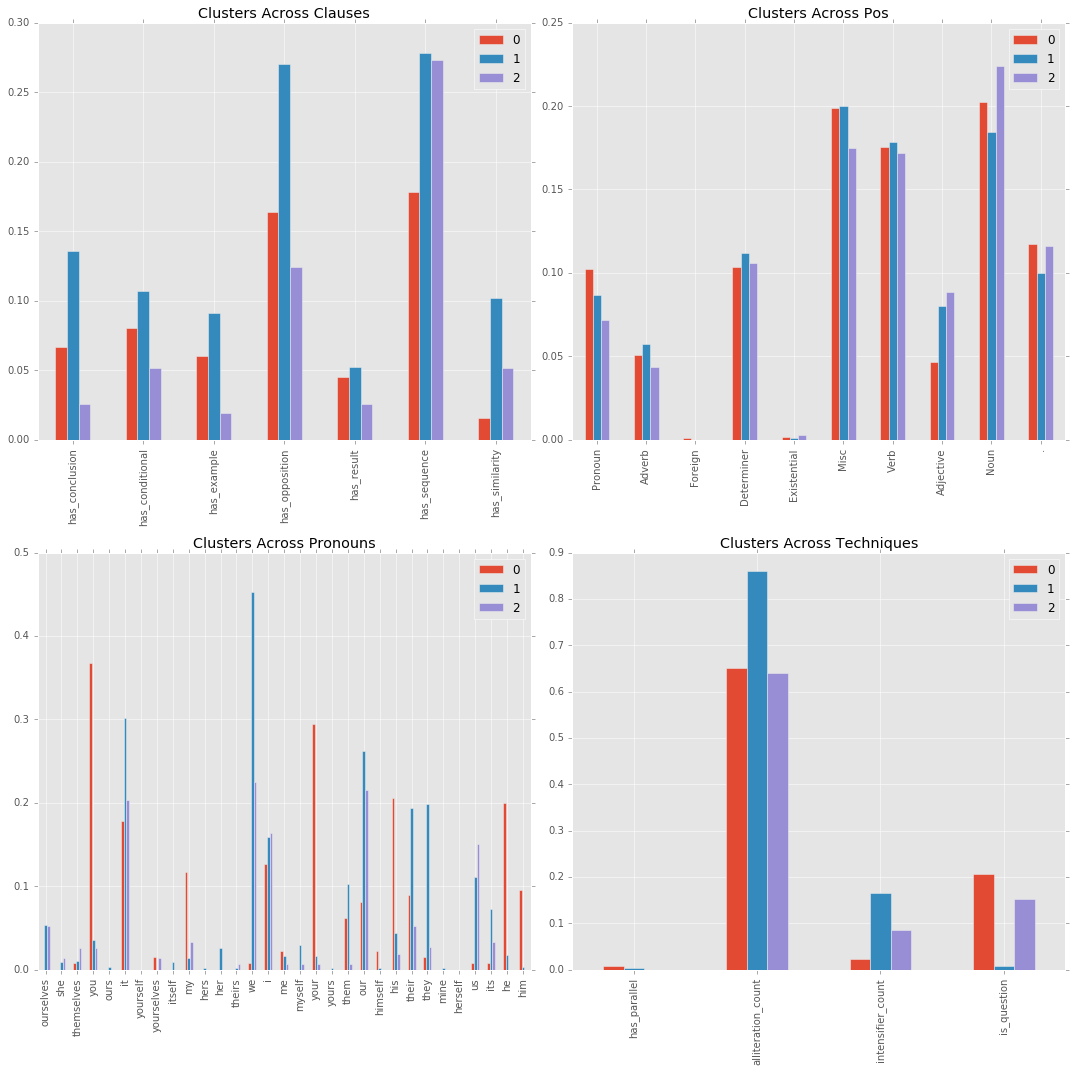

,cluster,name,speaker
0,1,Beaches,Churchill
1,1,FinestHour,Churchill
2,2,PearlHarbor,FDR
3,2,LibertyDeath,Henry
4,1,Gettysburg,Lincoln
5,1,Sepulcher,Pericles
6,0,Infidels,Urban
7,0,BeYe,WillConq
8,1,SafeDem,Wilson


In [423]:
groups = {'Clauses':clause_cols, 'Techniques':technique_cols, 'Pronouns':pronoun_cols, 'Pos':pos_cols}
clusters = cluster_speeches(df, clause_cols+technique_cols+pronoun_cols+pos_cols, speech_meta, 3, groups)
clusters[0]

In [432]:
speech_meta = ['party','speaker','year']

inaugural_df = pd.DataFrame(columns=speech_meta+clause_cols+technique_cols+Speech.pronouns+pos_cols)

for fn in os.listdir('speeches/PresidentialNom/'):
    if fn.endswith('.txt'):
        party,speaker,year=fn.rstrip('.txt').split('-')
        if 1==1:#speaker in ['JFK','FDR','Churchill']:
            fp = 'speeches/PresidentialNom/' + fn
            text = open(fp).read().lower()
            speech = Speech(text)
            metrics = speech.metrics
            metrics['party'] = party
            metrics['speaker'] = speaker
            metrics['year'] = year
            inaugural_df.loc[len(inaugural_df)] = metrics

In [433]:
all_speakers = inaugural_df['speaker'].tolist()
def second_term(row):
    speaker = row['speaker']
    if all_speakers.count(speaker) == 2:
        this_year = row['year']
        reelect_year = inaugural_df[inaugural_df.speaker==row['speaker']]['year'].max()
        if this_year == reelect_year:
            return True
    return False

inaugural_df['reelection'] = inaugural_df.apply(second_term, axis=1)

In [434]:
inaugural_df.columns

Index(['party', 'speaker', 'year', 'has_conclusion', 'has_conditional',
       'has_example', 'has_opposition', 'has_result', 'has_sequence',
       'has_similarity', 'has_parallel', 'alliteration_count',
       'intensifier_count', 'is_question', 'ourselves', 'she', 'themselves',
       'you', 'ours', 'it', 'yourself', 'yourselves', 'itself', 'my', 'hers',
       'her', 'theirs', 'we', 'i', 'me', 'myself', 'your', 'yours', 'them',
       'our', 'himself', 'his', 'their', 'they', 'mine', 'herself', 'us',
       'its', 'he', 'him', 'Pronoun', 'Adverb', 'Foreign', 'Determiner',
       'Existential', 'Misc', 'Verb', 'Adjective', 'Noun', '.', 'reelection'],
      dtype='object')

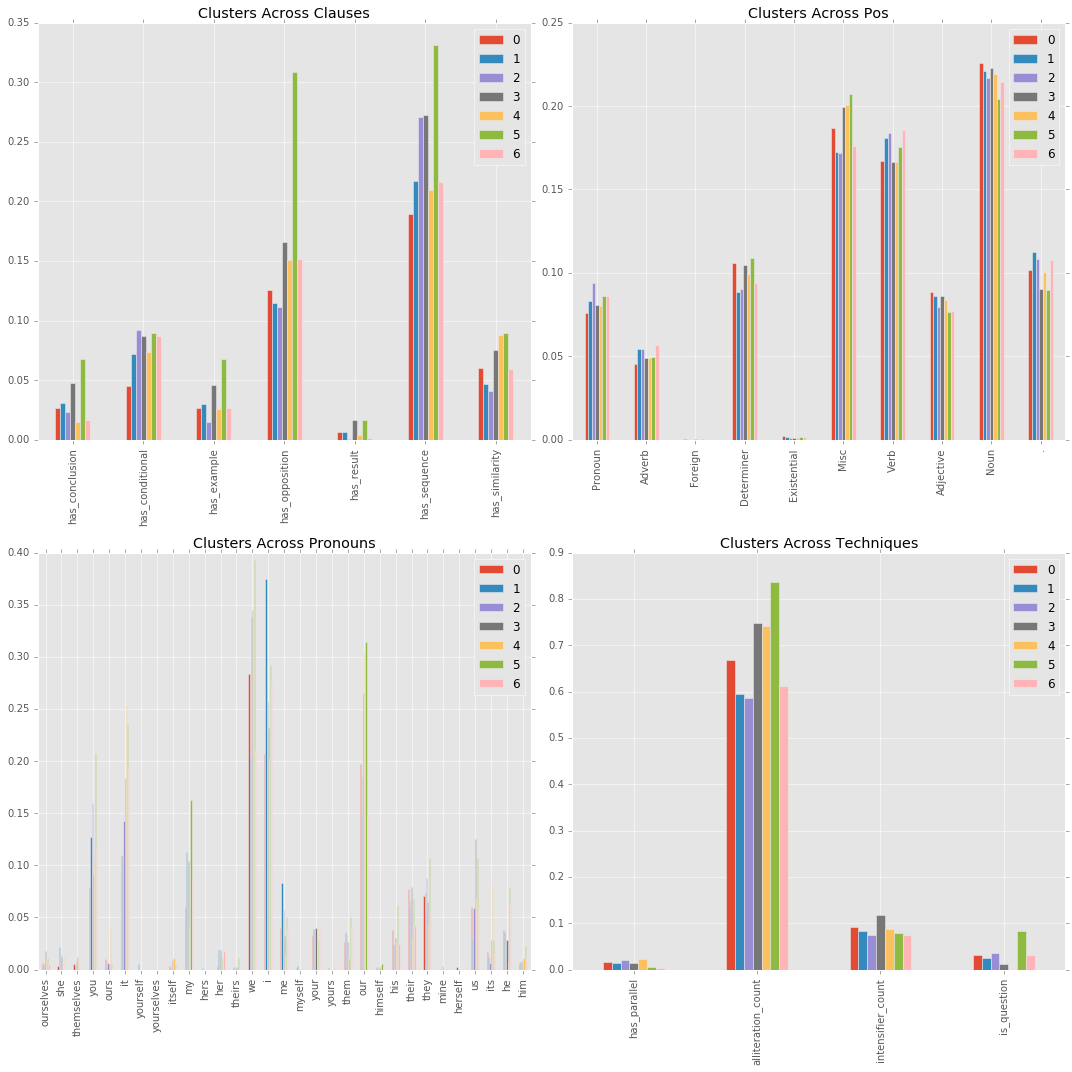

,cluster,party,reelection,speaker,year
0,4,Dem,False,Carter,1976
1,0,Dem,True,Carter,1980
2,6,Dem,False,Clinton,1992
3,2,Dem,True,Clinton,1996
4,3,Dem,False,Dukakis,1988
5,1,Dem,False,Gore,2000
6,0,Dem,False,Humphrey,1968
7,0,Dem,False,Johnson,1964
8,0,Dem,False,Kennedy,1960
9,2,Dem,False,Kerry,2004


In [435]:
data_cols = ['party','year','speaker','reelection']
inaugural_clusters = cluster_speeches(inaugural_df, clause_cols+technique_cols+pronoun_cols+pos_cols, data_cols, 7, groups)  
inaugural_clusters[0]

In [436]:
inaugural_clusters[0].groupby(['cluster','reelection']).size()

cluster  reelection
0        False         5
         True          3
1        False         2
         True          1
2        False         2
         True          2
3        False         4
4        False         2
5        False         1
6        False         6
dtype: int64

# Try something where you look at non-rhetorical speeche and rhetorical and see if rhetorical clusters together

In [437]:
speech_meta = ['speaker','name']
speech_df = pd.DataFrame(columns=speech_meta+clause_cols+technique_cols+Speech.pronouns+pos_cols)
fpaths = []
for fn in os.listdir('speeches/CallToWar/'):
    if fn.endswith('.txt'):
        fp = 'speeches/CallToWar/' + fn
        fpaths += [fp]
        
for fn in os.listdir('speeches/Peace'):
    if fn.endswith('.txt'):
        fp = 'speeches/Peace/' + fn
        fpaths += [fp]
        
for fpath in fpaths:
    fn = fpath.split('/')[-1]
    speaker,name=fn.rstrip('.txt').split('-')
    text = open(fpath).read().lower()
    speech = Speech(text)
    metrics = speech.metrics
    metrics['name'] = name
    metrics['speaker'] = speaker
    speech_df.loc[len(speech_df)] = metrics

In [438]:
speech_df

,speaker,name,has_conclusion,has_conditional,has_example,has_opposition,has_result,has_sequence,has_similarity,has_parallel,...,Pronoun,Adverb,Foreign,Determiner,Existential,Misc,Verb,Adjective,Noun,.
0,Churchill,Beaches,0.142857,0.142857,0.142857,0.142857,0.000000,0.285714,0.285714,0.000000,...,0.082857,0.031429,0.000000,0.120000,0.000000,0.202857,0.194286,0.065714,0.180000,0.122857
1,Churchill,FinestHour,0.132911,0.107595,0.101266,0.227848,0.082278,0.329114,0.069620,0.006329,...,0.072708,0.059167,0.000417,0.120208,0.002292,0.196875,0.173750,0.088542,0.196458,0.089583
2,FDR,PearlHarbor,0.038462,0.076923,0.038462,0.115385,0.038462,0.346154,0.076923,0.000000,...,0.050173,0.041522,0.000000,0.108997,0.001730,0.183391,0.140138,0.115917,0.254325,0.103806
3,Henry,LibertyDeath,0.013333,0.026667,0.000000,0.133333,0.013333,0.200000,0.026667,0.000000,...,0.093391,0.045977,0.000000,0.103448,0.003592,0.165948,0.204023,0.061063,0.193966,0.128592
4,Lincoln,Gettysburg,0.200000,0.000000,0.000000,0.400000,0.100000,0.200000,0.000000,0.000000,...,0.093548,0.090323,0.000000,0.112903,0.000000,0.161290,0.190323,0.080645,0.145161,0.125806
5,Pericles,Sepulcher,0.094737,0.178947,0.115789,0.357895,0.021053,0.273684,0.115789,0.000000,...,0.108623,0.054479,0.000000,0.093249,0.001003,0.215909,0.160762,0.077206,0.196190,0.092580
6,Urban,Infidels,0.046154,0.030769,0.076923,0.153846,0.046154,0.138462,0.030769,0.015385,...,0.090132,0.050000,0.000000,0.109868,0.001316,0.203947,0.193421,0.053289,0.192763,0.105263
7,WillConq,BeYe,0.086957,0.130435,0.043478,0.173913,0.043478,0.217391,0.000000,0.000000,...,0.114961,0.051969,0.001575,0.097638,0.001575,0.193701,0.157480,0.039370,0.212598,0.129134
8,Wilson,SafeDem,0.106796,0.106796,0.097087,0.223301,0.058252,0.300971,0.038835,0.009709,...,0.074937,0.051646,0.000000,0.112911,0.001772,0.223038,0.172152,0.089620,0.204810,0.069114
9,Dalai,Nobel,0.021277,0.021277,0.042553,0.085106,0.021277,0.063830,0.063830,0.042553,...,0.053881,0.030137,0.000000,0.119635,0.000913,0.210046,0.149772,0.094064,0.260274,0.081279


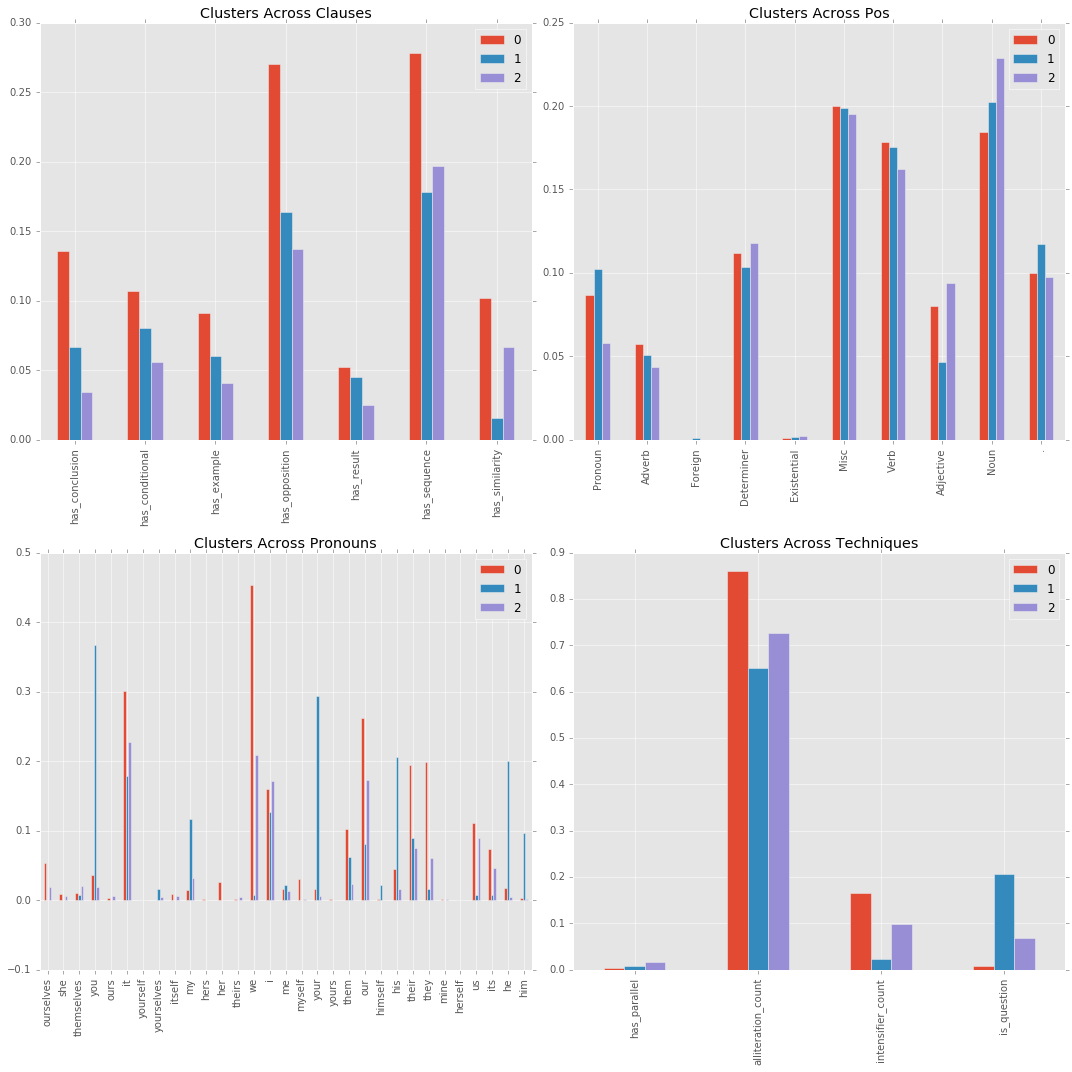

,cluster,name,speaker
0,0,Beaches,Churchill
1,0,FinestHour,Churchill
2,2,PearlHarbor,FDR
3,2,LibertyDeath,Henry
4,0,Gettysburg,Lincoln
5,0,Sepulcher,Pericles
6,1,Infidels,Urban
7,1,BeYe,WillConq
8,0,SafeDem,Wilson
9,2,Nobel,Dalai


In [440]:
data_cols = ['speaker','name']
speech_clusters = cluster_speeches(speech_df, clause_cols+technique_cols+pronoun_cols+pos_cols, data_cols, 3, groups)  
speech_clusters[0]